In [1]:
#Importing libraries, Data Cleaning, ect

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:/ML/python/data/PRODUCT_SALES.csv',delimiter=',')


df.info()
df.isna().sum()
df = df.drop('Age_Group_NUMBER',axis=1)
print(df.dtypes)
df['Customer_Gender'] = [1 if X == 'M' else 0 for X in df['Customer_Gender']]
df['Average_Cost'] = df['Unit_Cost']
df = df.drop('Unit_Cost',axis=1)
df['Unit_Price'].describe()

# segmenting the age groups
df['Adults'] = (df['Age_Group'] == 'Adults (35-64)').astype(int)
df['Young_Adults'] = (df['Age_Group'] == 'Young Adults (25-34)').astype(int)
df['Youth'] = (df['Age_Group'] == 'Youth (<25)').astype(int)
df['Seniors'] = (df['Age_Group'] == 'Seniors (64+)').astype(int)


df['Consumer_Surplus'] = (np.max(df['Unit_Price']) - df['Average_Cost']) * df['Order_Quantity'] / 2


df['Marginal_Cost'] = sym.diff(df['Cost'])

df['Marginal_Revenue'] = sym.diff(df['Revenue'])

df.dropna()

df.isna().sum()
df['Age_Group'].value_counts()



# turning each Product into a interger
 

df['Accessories'] = (df['Product_Category'] == 'Accessories').astype(int)
df['Bikes'] = (df['Product_Category'] == 'Bikes').astype(int)
df['Clothing'] = (df['Product_Category'] == 'Clothing').astype(int)







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Age_Group_NUMBER  113036 non-null  int64  
 7   Customer_Gender   113036 non-null  object 
 8   Country           113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Order_Quantity    113036 non-null  int64  
 11  Unit_Cost         113036 non-null  float64
 12  Unit_Price        113036 non-null  float64
 13  Profit            113036 non-null  float64
 14  Cost              113036 non-null  float64
 15  Revenue           113036 non-null  float64
dtypes: float64(5), int64

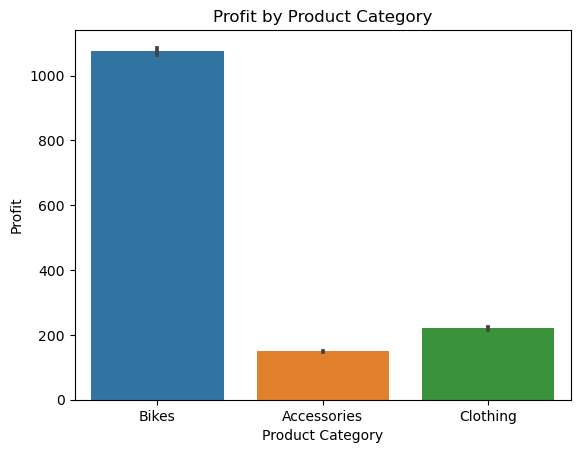

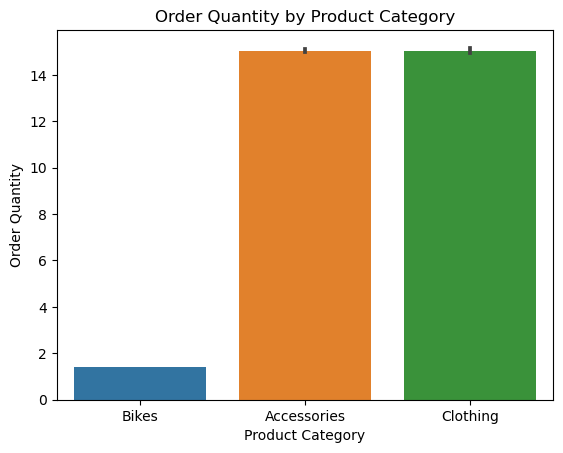

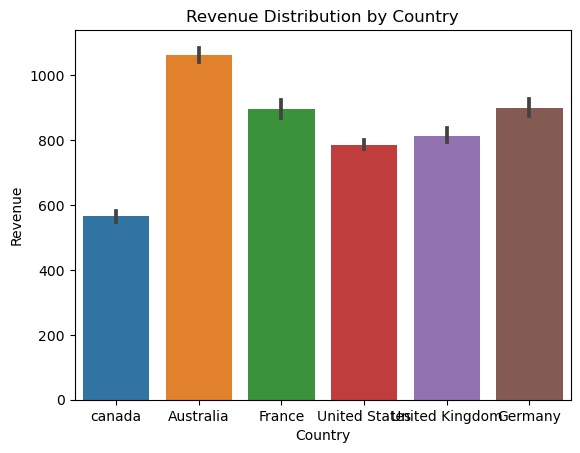

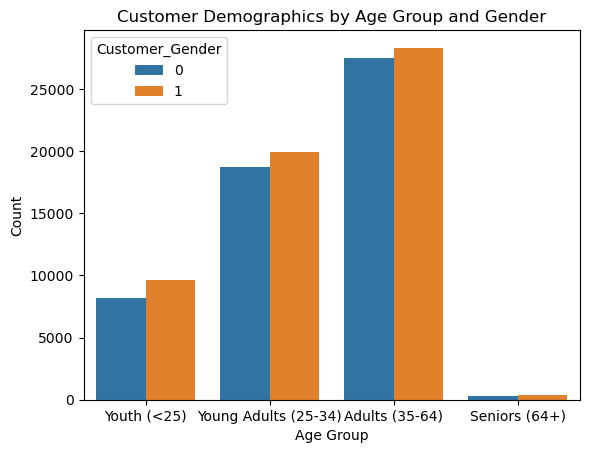

In [2]:
#Descriptive Stats
# descriptive statistics

def product_category_Profit(df):

    sns.barplot(x='Product_Category', y='Profit', data=df)
    plt.xlabel('Product Category')
    plt.ylabel('Profit')
    plt.title('Profit by Product Category')
    plt.show()

product_category_Profit(df)


def product_category_Quantity(df):
    sns.barplot(x='Product_Category', y='Order_Quantity', data=df)
    plt.xlabel('Product Category')
    plt.ylabel('Order Quantity')
    plt.title('Order Quantity by Product Category')
    plt.show()

product_category_Quantity(df)


def country_revenue(df):
    sns.barplot(x='Country', y='Revenue', data=df)
    plt.xlabel('Country')
    plt.ylabel('Revenue')
    plt.title('Revenue Distribution by Country')
    plt.show()


country_revenue(df)

def age_group_by_gender(df):
    sns.countplot(x='Age_Group', hue='Customer_Gender', data=df)
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.title('Customer Demographics by Age Group and Gender')
    plt.show()


age_group_by_gender(df)

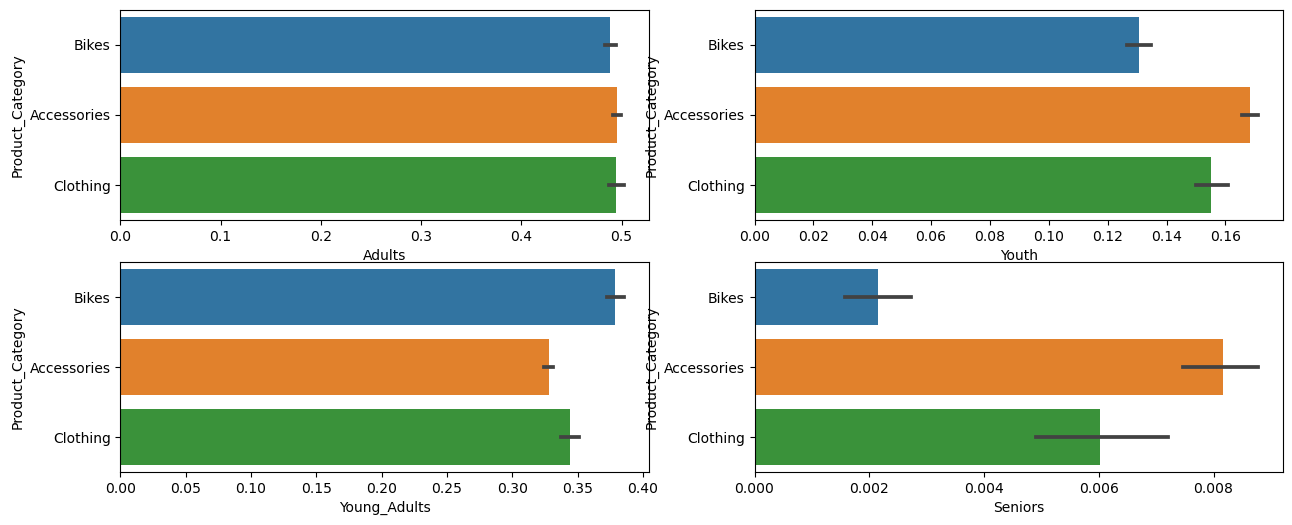

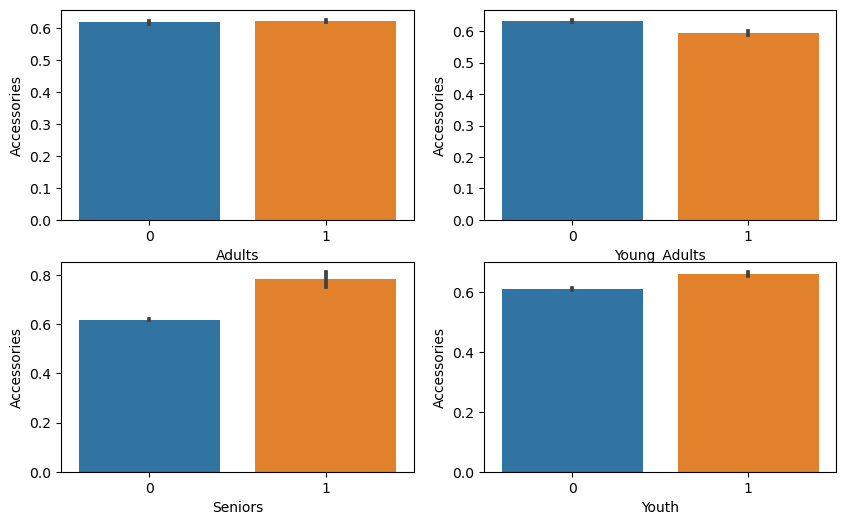

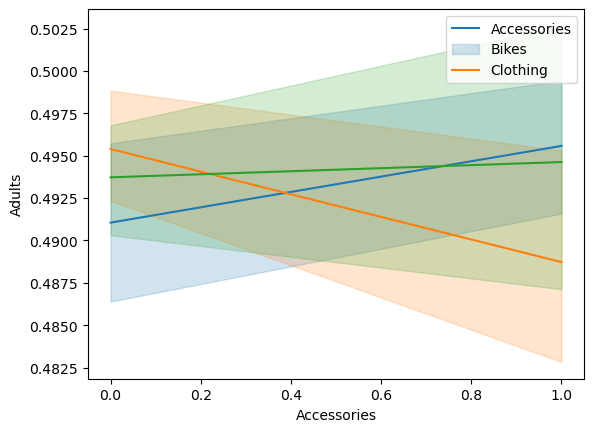

In [3]:
#Types of consumers to segment
def category_types_age_group(df):
    f,axs = plt.subplots(2,2,figsize=(15,6))
    sns.barplot(x='Adults',y='Product_Category',ax=axs[0,0],data=df)
    sns.barplot(x='Youth',y='Product_Category',ax=axs[0,1],data=df)
    sns.barplot(x='Young_Adults',y='Product_Category',ax=axs[1,0],data=df)
    sns.barplot(x='Seniors',y='Product_Category',ax=axs[1,1],data=df)
    plt.show()

category_types_age_group(df)


def Quantity_by_type_accessories(df):
    f1, axs2 = plt.subplots(2,2,figsize=(10,6))
    sns.barplot(x='Adults',y='Accessories',ax=axs2[0,0],data=df)
    sns.barplot(x='Young_Adults',y='Accessories',ax=axs2[0,1],data=df)
    sns.barplot(x='Seniors',y='Accessories',ax=axs2[1,0],data=df)
    sns.barplot(x='Youth',y='Accessories',ax=axs2[1,1],data=df)
    plt.show()
    

Quantity_by_type_accessories(df)




def category_consumer_types_adults_products(df):
    sns.lineplot(x='Accessories',y='Adults',data=df)
    sns.lineplot(x='Bikes',y='Adults',data=df)
    sns.lineplot(x='Clothing',y='Adults',data=df)
    plt.legend(labels=['Accessories','Bikes','Clothing'])
    plt.show()
    
    
category_consumer_types_adults_products(df)

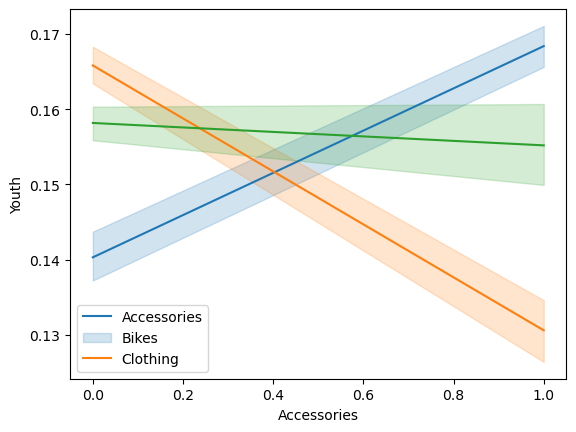

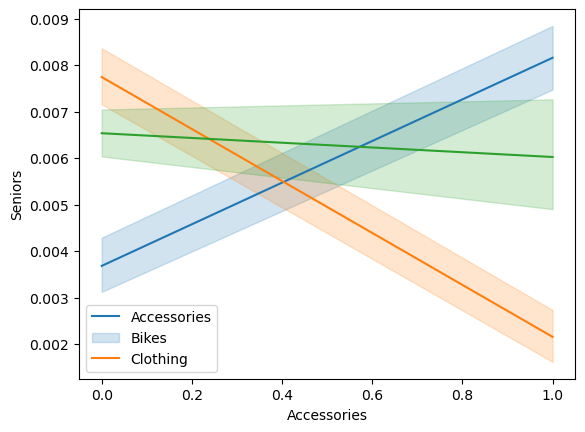

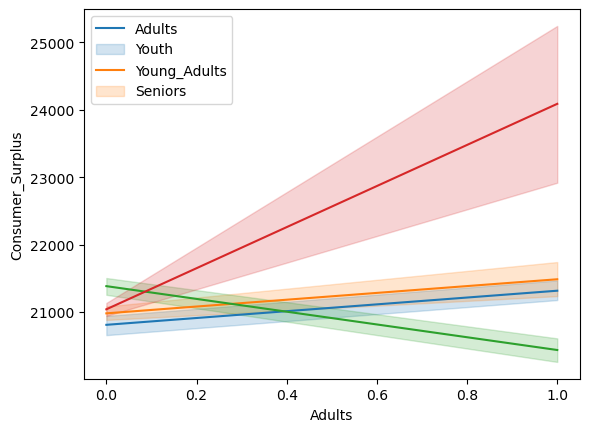

In [4]:
def consumer_types_youth_products(df):
    sns.lineplot(x='Accessories',y='Youth',data=df)
    sns.lineplot(x='Bikes',y='Youth',data=df)
    sns.lineplot(x='Clothing',y='Youth',data=df)
    plt.legend(labels=['Accessories','Bikes','Clothing'])
    plt.show()
    
consumer_types_youth_products(df)





def consumer_types_seniors_products(df):
    sns.lineplot(x='Accessories',y='Seniors',data=df)
    sns.lineplot(x='Bikes',y='Seniors',data=df)
    sns.lineplot(x='Clothing',y='Seniors',data=df)
    plt.legend(labels=['Accessories','Bikes','Clothing'])
    plt.show()
    
consumer_types_seniors_products(df)


def consumer_surplus_Age_Group(df):
    sns.lineplot(y='Consumer_Surplus',x='Adults',data=df)
    sns.lineplot(y='Consumer_Surplus',x='Youth',data=df)
    sns.lineplot(y='Consumer_Surplus',x='Young_Adults',data=df)
    sns.lineplot(y='Consumer_Surplus',x='Seniors',data=df)
    plt.legend(labels=['Adults','Youth','Young_Adults','Seniors'])
    plt.show()

consumer_surplus_Age_Group(df)

Date                      31-12-20
Day                             31
Month                    September
Year                          2021
Customer_Age                    64
Age_Group           Adults (35-64)
Customer_Gender                  1
Country                     canada
Product_Category       Accessories
Order_Quantity                  32
Unit_Price                   159.0
Profit                      2250.0
Cost                        1350.0
Revenue                     3600.0
Average_Cost                  59.0
Adults                           1
Young_Adults                     0
Youth                            0
Seniors                          0
Consumer_Surplus           57232.0
Marginal_Cost               1320.0
Marginal_Revenue            3540.0
Accessories                      1
Bikes                            0
Clothing                         0
dtype: object
Date                   31-12-20
Day                          31
Month                 September
Year           

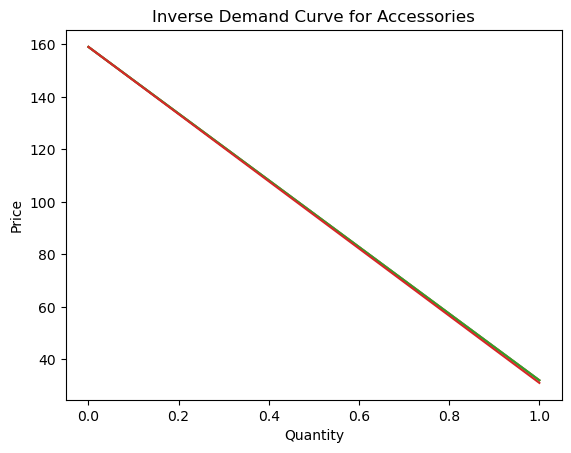

In [5]:
#seperate inverse demand curve for Product A
max_wtp_adults_accessories = df[(df['Accessories'] == 1) & (df['Adults'] == 1)].max()
print(max_wtp_adults_accessories)
Max_WTP_ACC_Youth = df[(df['Accessories'] == 1) & (df['Youth'] == 1)].max()
print(Max_WTP_ACC_Youth)
Max_WTP_Young_Adults_ACC = df[(df['Accessories'] == 1) & (df['Young_Adults'] == 1)].max()
print(Max_WTP_Young_Adults_ACC)
MAX_WTP_Seniors_ACC = df[(df['Accessories'] == 1) & (df['Seniors'] == 1)].max()
print(MAX_WTP_Seniors_ACC)

MAX_WTP_accessories = pd.DataFrame([max_wtp_adults_accessories,Max_WTP_ACC_Youth,Max_WTP_Young_Adults_ACC,MAX_WTP_Seniors_ACC])
MAX_WTP_accessories.describe()
MAX_WTP_accessories.isna().sum()

Q_A = MAX_WTP_accessories['Order_Quantity']
P_A = MAX_WTP_accessories['Unit_Price']
AC_A = MAX_WTP_accessories['Average_Cost']
#downward sloping inverse demand curve for Accessories

def demand_A(P_A,Q_A):
    return P_A,Q_A

def plot_of_demand_for_product_A(P_A,Q_A):
    plt.plot(demand_A(P_A, Q_A))
    plt.title('Inverse Demand Curve for Accessories')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()


plot_of_demand_for_product_A(P_A, Q_A)


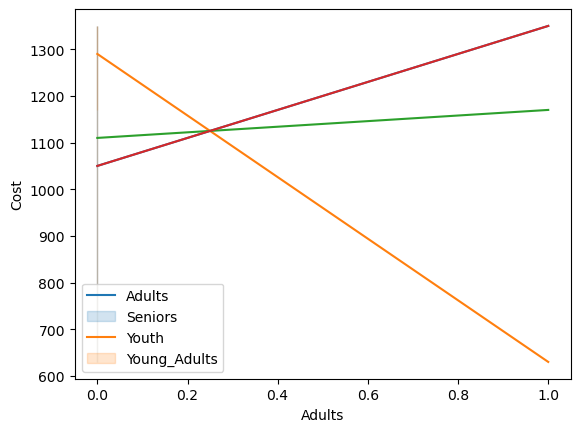

In [6]:
def MAX_WTP_accessories_cost(MAX_WTP_accessories):
    sns.lineplot(x='Adults',y='Cost',data=MAX_WTP_accessories)
    sns.lineplot(x='Seniors',y='Cost',data=MAX_WTP_accessories)
    sns.lineplot(x='Youth',y='Cost',data=MAX_WTP_accessories)
    sns.lineplot(x='Young_Adults',y='Cost',data=MAX_WTP_accessories)
    plt.legend(labels=['Adults','Seniors','Youth','Young_Adults'])
    plt.show()
    
    
MAX_WTP_accessories_cost(MAX_WTP_accessories)



In [7]:
#Two-Part Tariff Segment A

CSA = MAX_WTP_accessories['Consumer_Surplus']
AC_A
fixed_fee_A = P_A[3]
per_unit_charge_A = 59.0


#total profit under optimal T* for accessories

max_profit_T_A = (Q_A[3]) * 4 * (P_A - AC_A) + fixed_fee_A




print('Fixed Fee_A: ', fixed_fee_A)
print('Per-Unit Charge:', per_unit_charge_A)
print('Max Profit under Two-Part Tariff consumer A:', max_profit_T_A[0])



Fixed Fee_A:  159.0
Per-Unit Charge: 59.0
Max Profit under Two-Part Tariff consumer A: 12559.0


Date                      31-12-21
Day                             31
Month                    September
Year                          2021
Customer_Age                    64
Age_Group           Adults (35-64)
Customer_Gender                  1
Country                     canada
Product_Category             Bikes
Order_Quantity                   4
Unit_Price                  3578.0
Profit                      5952.0
Cost                        8684.0
Revenue                    14312.0
Average_Cost                2171.0
Adults                           1
Young_Adults                     0
Youth                            0
Seniors                          0
Consumer_Surplus            6566.0
Marginal_Cost               8682.0
Marginal_Revenue           14307.0
Accessories                      0
Bikes                            1
Clothing                         0
dtype: object
Date                     30-07-20
Day                            30
Month                         May
Year     

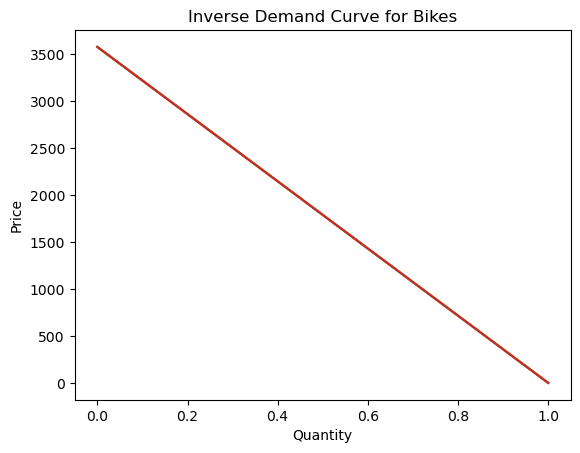

In [8]:
#inverse demand curve Product B
max_wtp_bikes_adults = df[(df['Bikes'] == 1) & (df['Adults'] == 1)].max()
max_wtp_bikes_young_adults = df[(df['Bikes'] == 1) & (df['Young_Adults'] == 1)].max()
max_wtp_bikes_Youth = df[(df['Bikes'] == 1) & (df['Youth'] == 1)].max()
max_wtp_bikes_seniors = df[(df['Bikes'] == 1) & (df['Seniors'] == 1)].max()
print(max_wtp_bikes_adults)
print(max_wtp_bikes_seniors)
print(max_wtp_bikes_Youth)
print(max_wtp_bikes_young_adults)

MAX_WTP_BIKES = pd.DataFrame([max_wtp_bikes_Youth,max_wtp_bikes_adults,max_wtp_bikes_seniors,max_wtp_bikes_young_adults])
# Demand curve for bikes

P_B = MAX_WTP_BIKES['Unit_Price']
Q_B = MAX_WTP_BIKES['Order_Quantity']

def demand_B(P_B,Q_B):
    return P_B,Q_B


def plot_of_demand_for_product_B(P_B,Q_B):
    plt.plot(demand_B(P_B, Q_B))
    plt.title('Inverse Demand Curve for Bikes')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()


plot_of_demand_for_product_B(P_B, Q_B)

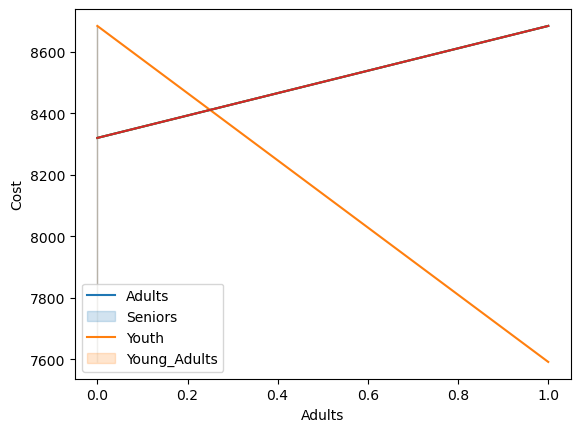

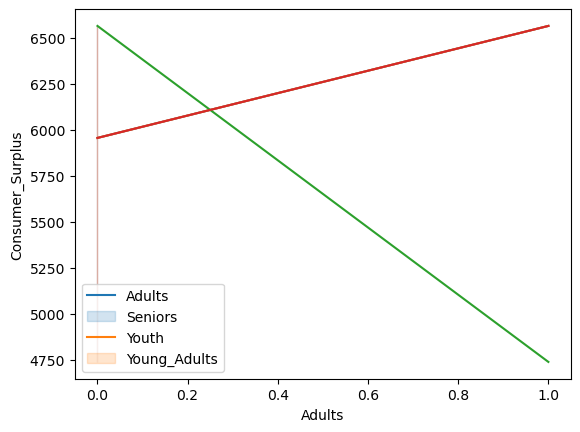

In [9]:
def MAX_WTP_BIKES_cost(MAX_WTP_BIKES):
    sns.lineplot(x='Adults',y='Cost',data=MAX_WTP_BIKES)
    sns.lineplot(x='Seniors',y='Cost',data=MAX_WTP_BIKES)
    sns.lineplot(x='Youth',y='Cost',data=MAX_WTP_BIKES)
    sns.lineplot(x='Young_Adults',y='Cost',data=MAX_WTP_BIKES)
    plt.legend(labels=['Adults','Seniors','Youth','Young_Adults'])
    plt.show()
    
    
MAX_WTP_BIKES_cost(MAX_WTP_BIKES)

def MAX_WTP_BIKES_CS(MAX_WTP_BIKES):
    sns.lineplot(x='Adults',y='Consumer_Surplus',data=MAX_WTP_BIKES)
    sns.lineplot(x='Young_Adults',y='Consumer_Surplus',data=MAX_WTP_BIKES)
    sns.lineplot(x='Seniors',y='Consumer_Surplus',data=MAX_WTP_BIKES)
    sns.lineplot(x='Youth',y='Consumer_Surplus',data=MAX_WTP_BIKES)
    plt.legend(labels=['Adults','Seniors','Youth','Young_Adults'])
    plt.show()


MAX_WTP_BIKES_CS(MAX_WTP_BIKES)





In [10]:
#Two-part Tariff Product B



CSB = MAX_WTP_BIKES['Consumer_Surplus']
AC_B = MAX_WTP_BIKES['Average_Cost']
#Two-Part Tariff for product B
fixed_fee_B = AC_B[0]
per_unit_charge_B = P_B
max_profit_T_B = (Q_B[3]) * 4 * (P_B - AC_B) + fixed_fee_B

print('Fixed Fee for product B: ', fixed_fee_B)
print('Per-Unit Charge product B :', per_unit_charge_B[0])
print('Max Profit under Two-Part Tariff consumer B:', max_profit_T_B[0])

Fixed Fee for product B:  2171.0
Per-Unit Charge product B : 3578.0
Max Profit under Two-Part Tariff consumer B: 24683.0


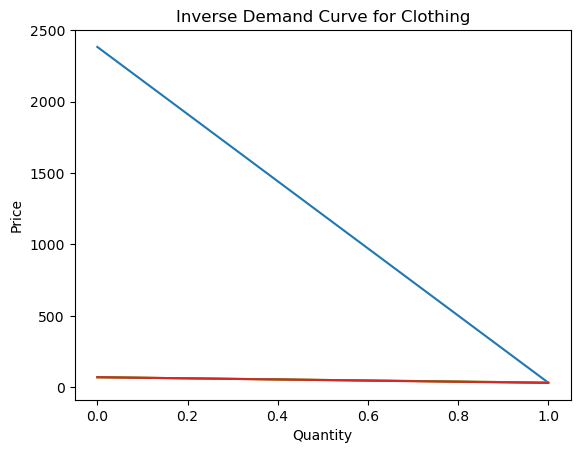

In [11]:
#Inverse Demand Curve Product C
max_wtp_clothing_adults = df[(df['Clothing'] == 1) & (df['Adults'] == 1)].max()
max_wtp_clothing_young_adults = df[(df['Clothing'] == 1) & (df['Young_Adults'] == 1)].max()
max_wtp_clothing_youth = df[(df['Clothing'] == 1) & (df['Youth'] == 1)].max()
max_wtp_clothing_seniors = df[(df['Clothing'] == 1) & (df['Seniors'] == 1)].max()

##^^^all of that combined into a dataframe
max_WTP_clothing = pd.DataFrame([max_wtp_clothing_adults,max_wtp_clothing_young_adults,max_wtp_clothing_youth,max_wtp_clothing_seniors])

#downward sloping inverse demand curve for clothing


P_C = max_WTP_clothing['Unit_Price']
Q_C = max_WTP_clothing['Order_Quantity']



def inverse_demand_C(P_C,Q_C):
    return P_C,Q_C


def plot_of_demand_for_product_C(P_C,Q_C):
    plt.plot(inverse_demand_C(P_C, Q_C))
    plt.title('Inverse Demand Curve for Clothing')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()



plot_of_demand_for_product_C(P_C, Q_C)

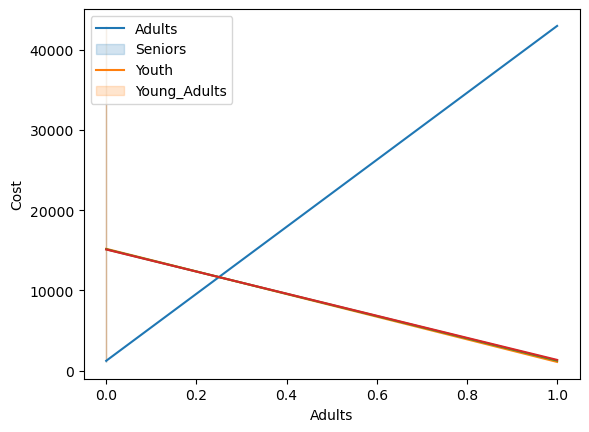

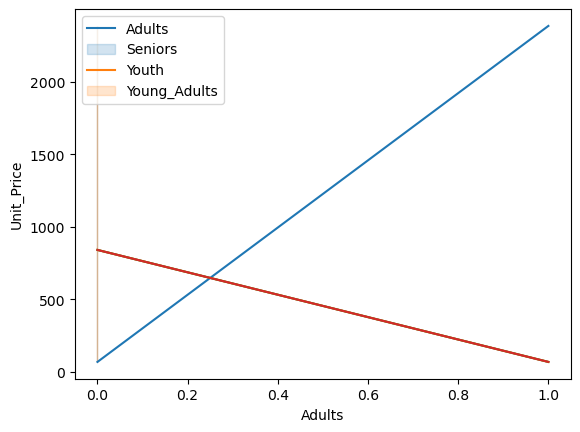

In [12]:
#Cost and Price paid for by each type
def max_WTP_clothing_cost(max_WTP_clothing):
    sns.lineplot(x='Adults',y='Cost',data=max_WTP_clothing)
    sns.lineplot(x='Seniors',y='Cost',data=max_WTP_clothing)
    sns.lineplot(x='Youth',y='Cost',data=max_WTP_clothing)
    sns.lineplot(x='Young_Adults',y='Cost',data=max_WTP_clothing)
    plt.legend(labels=['Adults','Seniors','Youth','Young_Adults'])
    plt.show()
    
    
max_WTP_clothing_cost(max_WTP_clothing)


def MAX_WTP_clothing_price_paid(max_WTP_clothing):
    sns.lineplot(x='Adults',y=P_C,data=max_WTP_clothing)
    sns.lineplot(x='Young_Adults',y=P_C,data=max_WTP_clothing)
    sns.lineplot(x='Seniors',y=P_C,data=max_WTP_clothing)
    sns.lineplot(x='Youth',y=P_C,data=max_WTP_clothing)
    plt.legend(labels=['Adults','Seniors','Youth','Young_Adults'])
    plt.show()

MAX_WTP_clothing_price_paid(max_WTP_clothing)


In [13]:
#Two-Part Tariff for product C
#Two-Part Tariff for Clothing
CSC = max_WTP_clothing['Consumer_Surplus']
AC_C = max_WTP_clothing['Average_Cost']

fixed_fee_C = AC_C[1:3]
per_unit_charge_C = P_C[1:3]
max_profit_T_C = (Q_C[0:3]) * 3 * (P_C - AC_C[1:3]) + fixed_fee_C
max_profit_T_C.dropna()
print('Fixed fee product C: ',fixed_fee_C)
print('per unit charge for C: ',per_unit_charge_C)
print('max profit for good C under Tariff: ',max_profit_T_C.dropna())


Fixed fee product C:  1    42.0
2    42.0
Name: Average_Cost, dtype: float64
per unit charge for C:  1    70.0
2    70.0
Name: Unit_Price, dtype: float64
max profit for good C under Tariff:  1    2730.0
2    2730.0
dtype: float64


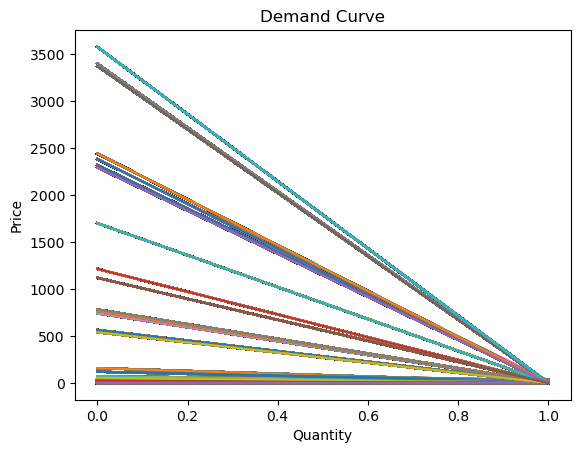

In [14]:
#Aggregate Demand Curve
P = df['Unit_Price']
Q = df['Order_Quantity']





def demand(P, Q):
    return P, Q


def aggregate_demand_curve(P, Q):
    plt.plot(demand(P, Q))
    plt.title('Demand Curve')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()

aggregate_demand_curve(P, Q)

LogisticRegression, --ACC-- 97.87%; --ROC-- 98.53%
DecisionTreeClassifier, --ACC-- 100.00%; --ROC-- 100.00%
GaussianNB, --ACC-- 98.74%; --ROC-- 98.33%
LinearDiscriminantAnalysis, --ACC-- 96.79%; --ROC-- 99.87%


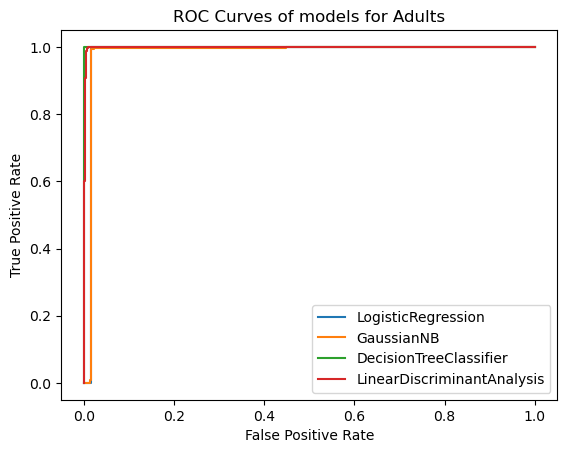

In [15]:
#Train/test split with adults as the target variable
# Train/test split with each consumer type being the target variable

X_adults = df.drop(['Age_Group','Adults'],axis=1)
y_adults = df['Adults']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_adults,y_adults,test_size=.20,random_state=42)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')


from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (ohe,X_adults.select_dtypes(include='object').columns),
    (imp,X_adults.select_dtypes(include=['int32','int64','float64']).columns),remainder='passthrough')


ct.fit_transform(X_adults)


from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


from sklearn.tree import DecisionTreeClassifier
trees = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

def evaluate_adults(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test,pred)
    roc = roc_auc_score(y_test, pred_prob)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    return pred,pred_prob

lr_pred,lr_pred_prob = evaluate_adults(X_train, X_test, y_train, y_test, lr)
tree_pred,tree_pred_prob = evaluate_adults(X_train, X_test, y_train, y_test, trees)
GNB_pred,GNB_pred_prob = evaluate_adults(X_train, X_test, y_train, y_test, GNB)
lda_pred,lda_pred_prob = evaluate_adults(X_train, X_test, y_train, y_test, lda)

def ROC_Adults(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves of models for Adults')


ROC_Adults(y_test, lr_pred_prob, lr)
ROC_Adults(y_test, GNB_pred_prob, GNB)
ROC_Adults(y_test, tree_pred_prob, trees)
ROC_Adults(y_test, lda_pred_prob, lda)
plt.legend()
plt.show()

LogisticRegression, --ACC-- 60.08%; --ROC-- 75.89%
DecisionTreeClassifier, --ACC-- 100.00%; --ROC-- 100.00%
GaussianNB, --ACC-- 99.01%; --ROC-- 99.64%
LinearDiscriminantAnalysis, --ACC-- 69.34%; --ROC-- 78.34%


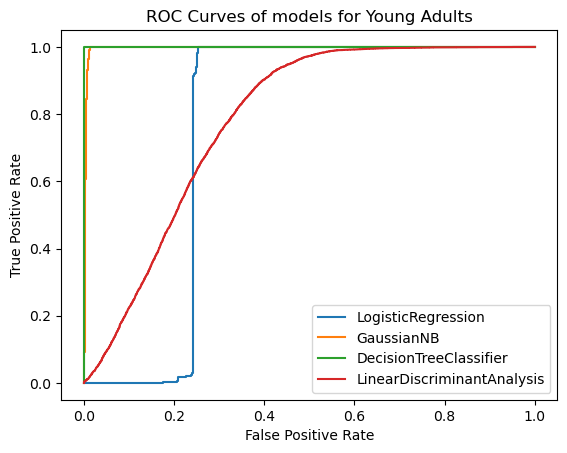

LogisticRegression, --ACC-- 99.10%; --ROC-- 99.93%
DecisionTreeClassifier, --ACC-- 100.00%; --ROC-- 100.00%
GaussianNB, --ACC-- 99.12%; --ROC-- 99.84%
LinearDiscriminantAnalysis, --ACC-- 99.64%; --ROC-- 99.97%


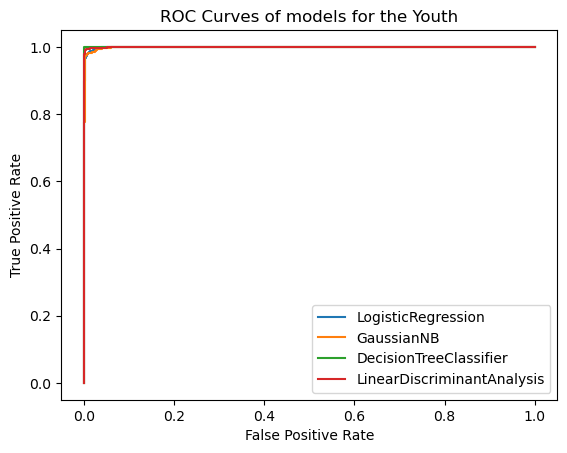

LogisticRegression, --ACC-- 99.46%; --ROC-- 97.36%
DecisionTreeClassifier, --ACC-- 100.00%; --ROC-- 100.00%
GaussianNB, --ACC-- 99.08%; --ROC-- 98.47%
LinearDiscriminantAnalysis, --ACC-- 99.95%; --ROC-- 99.98%


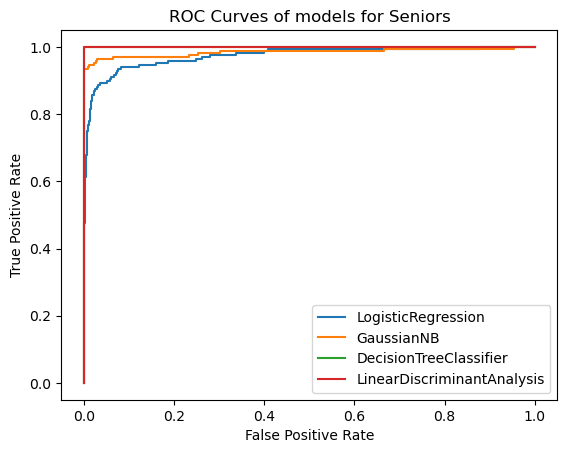

In [16]:
#Same Thing except for young adults, Youth, and Seniors


# for young adults

X_young_adults = df.drop(['Age_Group','Young_Adults'],axis=1)
Y_young_adults = df['Young_Adults']



X_train,X_test,y_train,y_test = train_test_split(X_young_adults,Y_young_adults,test_size=.20,random_state=42)


ohe = OneHotEncoder(sparse_output=False)


imp = SimpleImputer(strategy='most_frequent')




ct = make_column_transformer(
    (ohe,X_young_adults.select_dtypes(include='object').columns),
    (imp,X_young_adults.select_dtypes(include=['int32','int64','float64']).columns),remainder='passthrough')


ct.fit_transform(X_young_adults)




lr = LogisticRegression()



trees = DecisionTreeClassifier()


GNB = GaussianNB()


lda = LinearDiscriminantAnalysis()




def evaluate_young_adults(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test,pred)
    roc = roc_auc_score(y_test, pred_prob)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    return pred,pred_prob

lr_pred,lr_pred_prob = evaluate_young_adults(X_train, X_test, y_train, y_test, lr)
tree_pred,tree_pred_prob = evaluate_young_adults(X_train, X_test, y_train, y_test, trees)
GNB_pred,GNB_pred_prob = evaluate_young_adults(X_train, X_test, y_train, y_test, GNB)
lda_pred,lda_pred_prob = evaluate_young_adults(X_train, X_test, y_train, y_test, lda)

def ROC_young_adults(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves of models for Young Adults')


ROC_young_adults(y_test, lr_pred_prob, lr)
ROC_young_adults(y_test, GNB_pred_prob, GNB)
ROC_young_adults(y_test, tree_pred_prob, trees)
ROC_young_adults(y_test, lda_pred_prob, lda)
plt.legend()
plt.show()


# same thing but for youth

X_youth = df.drop(['Age_Group','Youth'],axis=1)
Y_youth = df['Youth']





X_train,X_test,y_train,y_test = train_test_split(X_youth,Y_youth,test_size=.20,random_state=42)


ohe = OneHotEncoder(sparse_output=False)


imp = SimpleImputer(strategy='most_frequent')




ct = make_column_transformer(
    (ohe,X_youth.select_dtypes(include='object').columns),
    (imp,X_youth.select_dtypes(include=['int32','int64','float64']).columns),remainder='passthrough')


ct.fit_transform(X_youth)




lr = LogisticRegression()



trees = DecisionTreeClassifier()


GNB = GaussianNB()


lda = LinearDiscriminantAnalysis()




def evaluate_youth(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test,pred)
    roc = roc_auc_score(y_test, pred_prob)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    return pred,pred_prob

lr_pred,lr_pred_prob = evaluate_youth(X_train, X_test, y_train, y_test, lr)
tree_pred,tree_pred_prob = evaluate_youth(X_train, X_test, y_train, y_test, trees)
GNB_pred,GNB_pred_prob = evaluate_youth(X_train, X_test, y_train, y_test, GNB)
lda_pred,lda_pred_prob = evaluate_youth(X_train, X_test, y_train, y_test, lda)

def ROC_youth(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves of models for the Youth')


ROC_youth(y_test, lr_pred_prob, lr)
ROC_youth(y_test, GNB_pred_prob, GNB)
ROC_youth(y_test, tree_pred_prob, trees)
ROC_youth(y_test, lda_pred_prob, lda)
plt.legend()
plt.show()


Xs = df.drop(['Age_Group','Seniors'],axis=1)
Ys = df['Seniors']



X_train,X_test,y_train,y_test = train_test_split(Xs,Ys,test_size=.20,random_state=42)


ohe = OneHotEncoder(sparse_output=False)


imp = SimpleImputer(strategy='most_frequent')




ct = make_column_transformer(
    (ohe,Xs.select_dtypes(include='object').columns),
    (imp,Xs.select_dtypes(include=['int32','int64','float64']).columns),remainder='passthrough')


ct.fit_transform(Xs)




lr = LogisticRegression()



trees = DecisionTreeClassifier()


GNB = GaussianNB()


lda = LinearDiscriminantAnalysis()




def evaluate_seniors(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test,pred)
    roc = roc_auc_score(y_test, pred_prob)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    return pred,pred_prob

lr_pred,lr_pred_prob = evaluate_seniors(X_train, X_test, y_train, y_test, lr)
tree_pred,tree_pred_prob = evaluate_seniors(X_train, X_test, y_train, y_test, trees)
GNB_pred,GNB_pred_prob = evaluate_seniors(X_train, X_test, y_train, y_test, GNB)
lda_pred,lda_pred_prob = evaluate_seniors(X_train, X_test, y_train, y_test, lda)

def ROC_seniors(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves of models for Seniors')


ROC_seniors(y_test, lr_pred_prob, lr)
ROC_seniors(y_test, GNB_pred_prob, GNB)
ROC_seniors(y_test, tree_pred_prob, trees)
ROC_seniors(y_test, lda_pred_prob, lda)
plt.legend()
plt.show()
